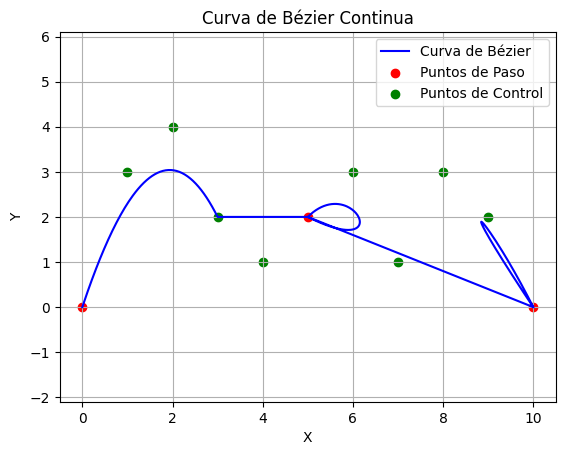

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de puntos de paso y puntos de control
Puntos_paso = np.array([[0, 0], [5, 2], [10, 0]])  # Ejemplo de puntos de paso
Puntos_control = np.array([
    [1, 3], [2, 4], [3, 2], [4, 1],  # Puntos de control para el primer segmento (BZ0 a BZ5)
    [6, 3], [7, 1],                   # Puntos de control para el segundo segmento (BZ5 a BZ8)
    [9, 2], [8, 3]                    # Puntos de control para el tercer segmento (BZ8 a BZ11)
])

# Función para calcular la curva de Bézier
def bezier_curve(P0, P1, P2, P3, t):
    return (1-t)[:, np.newaxis]**3 * P0 + 3 * (1-t)[:, np.newaxis]**2 * t[:, np.newaxis] * P1 + 3 * (1-t)[:, np.newaxis] * t[:, np.newaxis]**2 * P2 + t[:, np.newaxis]**3 * P3

# Crear un array para almacenar la curva completa
curva_completa = np.empty((0, 2))

# Primer segmento (con 4 puntos de control)
P0 = Puntos_paso[0]
P1, P2, P3, P4 = Puntos_control[0:4]
t = np.linspace(0, 1, 100)
curva = bezier_curve(P0, P1, P2, P3, t)  # BZ0 a BZ5 con 4 puntos de control
curva_completa = np.vstack((curva_completa, curva))

# Segmentar las curvas para los siguientes puntos de paso (con 2 puntos de control)
for i in range(1, len(Puntos_paso)):
    P0 = Puntos_paso[i]
    P1, P2 = Puntos_control[2*(i-1) + 4: 2*(i-1) + 6]  # Dos puntos de control por cada paso
    t = np.linspace(0, 1, 100)
    curva = bezier_curve(P0, P1, P2, P0, t)  # Calcula la curva
    curva_completa = np.vstack((curva_completa, curva))

# Graficar la curva completa
plt.figure()
plt.plot(curva_completa[:, 0], curva_completa[:, 1], c='blue', label='Curva de Bézier')

# Graficar los puntos de paso
plt.scatter(Puntos_paso[:, 0], Puntos_paso[:, 1], color='red', label='Puntos de Paso')

# Graficar los puntos de control
plt.scatter(Puntos_control[:, 0], Puntos_control[:, 1], color='green', label='Puntos de Control')

plt.legend()
plt.title('Curva de Bézier Continua')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.axis('equal')
plt.show()
